# Цель лабораторной работы

Изучение способов предварительной обработки данных для дальнейшего формирования моделей

# Задание

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
    * обработку пропусков в данных;
    * кодирование категориальных признаков;
    * масштабирование данных.

# Ход выполнения лабораторной работы

#### Подключим необхоимые библиотеки и загрузим набор данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

%matplotlib inline

sns.set(style="ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

pd.set_option("display.width", 70)

data = pd.read_csv('dc.csv')
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [2]:
data.shape

(6896, 13)

#### 1. Обработка пропусков в данных

In [3]:
# проверим есть ли пропущенные значения
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [4]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [5]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((6896, 13), (6896, 3))

In [6]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((6896, 13), (38, 13))

Будем работать с колонкой YEAR         

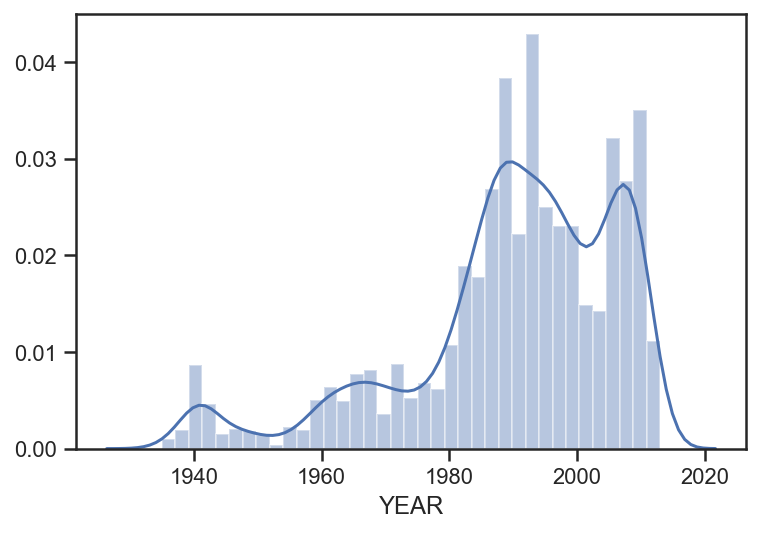

In [7]:
sns.distplot(data["YEAR"]);

Самый простой способ - это заполнить нулями

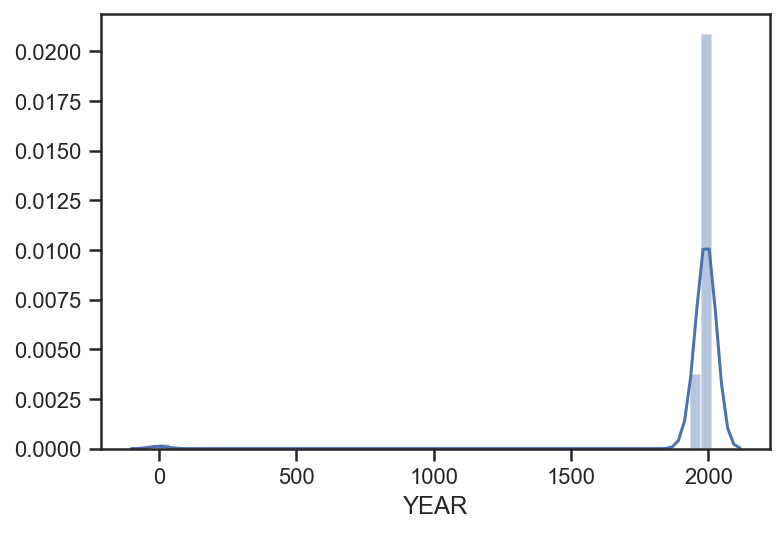

In [8]:
sns.distplot(data["YEAR"].fillna(0));

Видно, что в данной ситуации это приводит к выбросам. Будем присваивать средний год

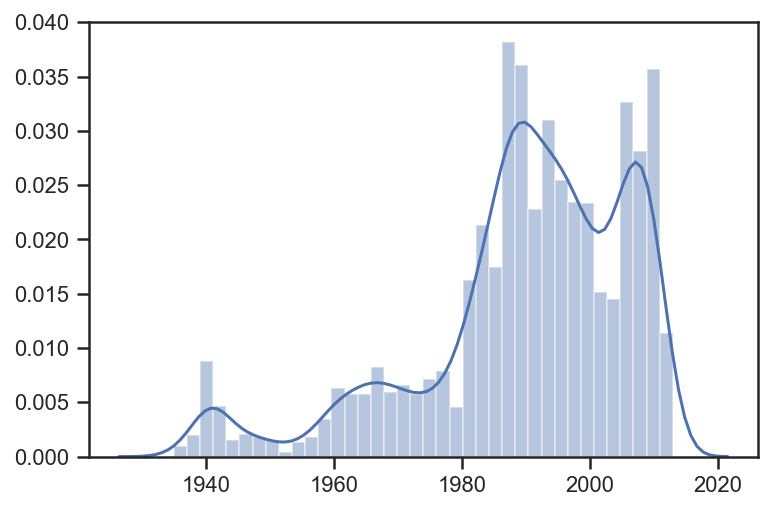

In [9]:
mean_imp = SimpleImputer(strategy="mean")
mean_rating = mean_imp.fit_transform(data[["YEAR"]])
sns.distplot(mean_rating);

Попробуем заполнение медианой и самым частым значением

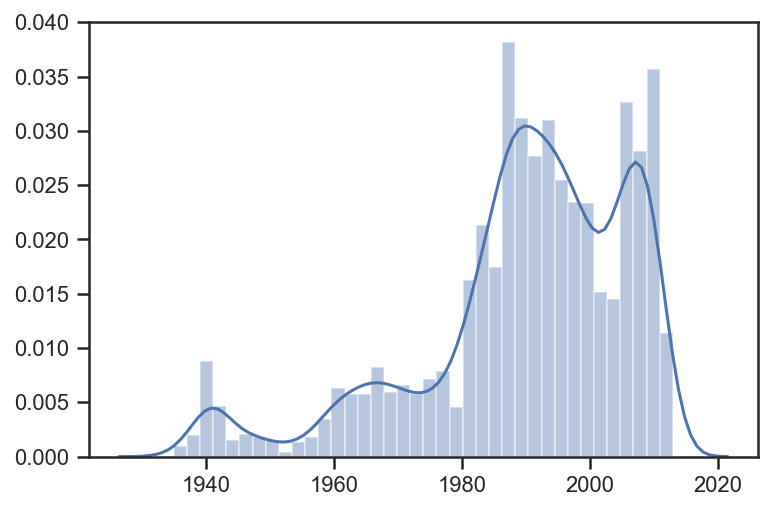

In [10]:
median_imp = SimpleImputer(strategy="median")
median_rating = median_imp.fit_transform(data[["YEAR"]])
sns.distplot(median_rating);

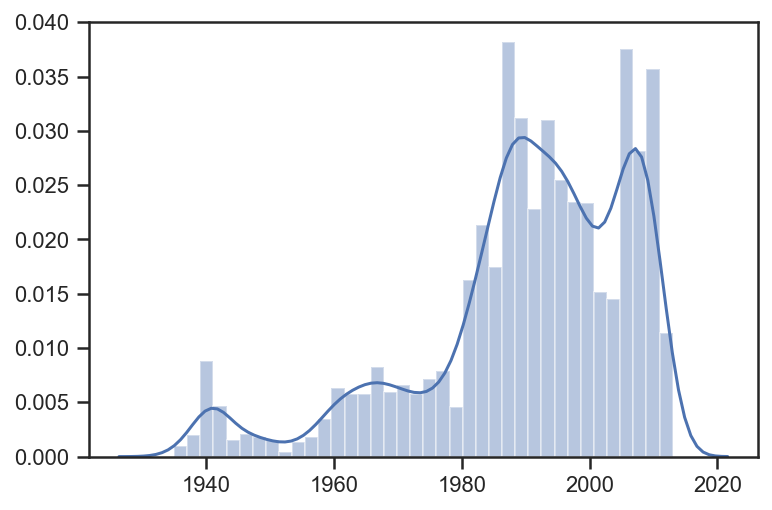

In [11]:
most_freq_imp = SimpleImputer(strategy="most_frequent")
most_freq_rating = most_freq_imp.fit_transform(data[["YEAR"]])
sns.distplot(most_freq_rating);

Будем использовать среднее значение

In [12]:
data["YEAR"] = mean_rating
data["YEAR"].isnull().sum()

0

Как видим, у колонки YEAR больше нет пропущенных значений

#### 2. Кодирование категориальных признаков

Рассмотрим колонку HAIR

In [13]:
categories = data["HAIR"].dropna().astype(str)
categories.value_counts()

Black Hair               1574
Brown Hair               1148
Blond Hair                744
Red Hair                  461
White Hair                346
Grey Hair                 157
Green Hair                 42
Blue Hair                  41
Purple Hair                32
Strawberry Blond Hair      28
Orange Hair                21
Pink Hair                  11
Gold Hair                   5
Violet Hair                 4
Silver Hair                 3
Reddish Brown Hair          3
Platinum Blond Hair         2
Name: HAIR, dtype: int64

In [14]:
le = LabelEncoder()
category_le = le.fit_transform(categories)
print(np.unique(category_le))
le.inverse_transform(np.unique(category_le))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


array(['Black Hair', 'Blond Hair', 'Blue Hair', 'Brown Hair', 'Gold Hair',
       'Green Hair', 'Grey Hair', 'Orange Hair', 'Pink Hair',
       'Platinum Blond Hair', 'Purple Hair', 'Red Hair',
       'Reddish Brown Hair', 'Silver Hair', 'Strawberry Blond Hair',
       'Violet Hair', 'White Hair'], dtype=object)

In [15]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


#### 3. Масштабирование данных

Min-Max масштабирование

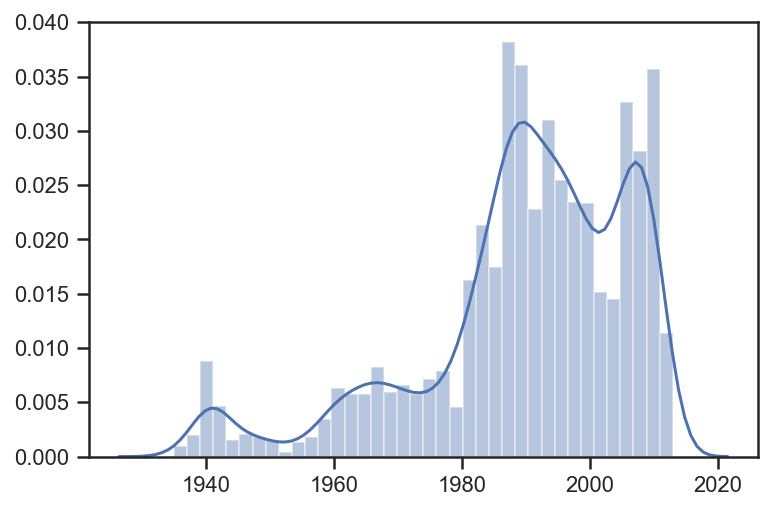

In [16]:
sns.distplot(data[["YEAR"]]);

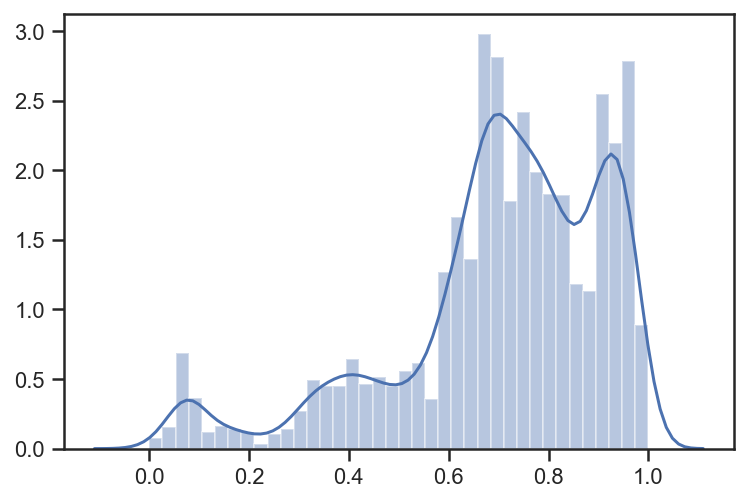

In [17]:
mm = MinMaxScaler()
sns.distplot(mm.fit_transform(data[["YEAR"]]));

На основе Z-оценки

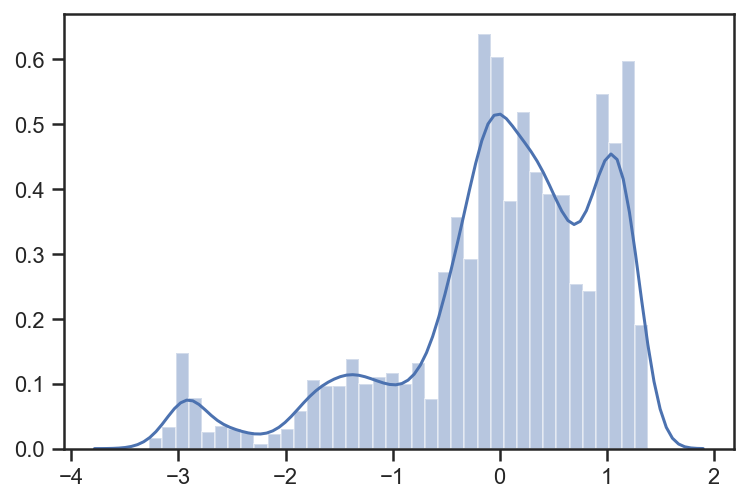

In [18]:
ss = StandardScaler()
sns.distplot(ss.fit_transform(data[["YEAR"]]));